<a href="https://colab.research.google.com/github/NisthaSharma/BrainTumor/blob/main/Tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from skimage import io
from matplotlib import pyplot as plt
import tensorflow as tf 

## IMAGE RESIZING AND APPLYING CLAHE TECHNIQUE

In [18]:


import cv2
import glob

path = glob.glob('drive/MyDrive/Brain_tumor_detection/brain/yes/*.jpg')
for file in path:
  img2 = cv2.imread(file)
  img = cv2.resize(img2,(256,256))
  lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  l, a, b = cv2.split(lab_img)
  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
  updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
  CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

  cv2.imwrite(file,CLAHE_img)

In [19]:
path = glob.glob('drive/MyDrive/Brain_tumor_detection/brain/no/*.jpg')
for file in path:
  img2 = cv2.imread(file)
  img = cv2.resize(img2,(256,256))
  lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  l, a, b = cv2.split(lab_img)
  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  clahe_img = clahe.apply(l)
#plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Combine the CLAHE enhanced L-channel back with A and B channels
  updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
  CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

  cv2.imwrite(file,CLAHE_img)


In [20]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [23]:
IMAGE_SIZE = [256, 256]

train_path = 'drive/MyDrive/Brain_tumor_detection/brain/Train'
valid_path = 'drive/MyDrive/Brain_tumor_detection/brain/Test'

In [24]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [25]:
for layer in vgg.layers:
    layer.trainable = False

In [33]:
folders = glob('drive/MyDrive/Brain_tumor_detection/brain/Train/*')


In [34]:
x = Flatten()(vgg.output)


In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [36]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [37]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2924 images belonging to 2 classes.


In [41]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [42]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
92/92 [==============================] - 2153s 23s/step - loss: 0.4325 - accuracy: 0.8434 - val_loss: 0.2003 - val_accuracy: 0.9150
Epoch 2/10
92/92 [==============================] - 2123s 23s/step - loss: 0.1448 - accuracy: 0.9542 - val_loss: 0.1267 - val_accuracy: 0.9550
Epoch 3/10
92/92 [==============================] - 2129s 23s/step - loss: 0.1011 - accuracy: 0.9665 - val_loss: 0.1196 - val_accuracy: 0.9550
Epoch 4/10
92/92 [==============================] - 2146s 23s/step - loss: 0.0705 - accuracy: 0.9802 - val_loss: 0.1050 - val_accuracy: 0.9700
Epoch 5/10
92/92 [==============================] - 2160s 23s/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0910 - val_accuracy: 0.9700
Epoch 6/10
92/92 [==============================] - 2159s 23s/step - loss: 0.0535 - accuracy: 0.9856 - val_loss: 0.2900 - val_accuracy: 0.8850
Epoch 7/10
92/92 [==============================] - 2159s 23s/step - loss: 0.0505 - accuracy: 0.9832 - val_loss: 0.0609 - val_accuracy: 0.9750

In [44]:

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16')

INFO:tensorflow:Assets written to: model_vgg16/assets


In [46]:
!zip -r ./files.zip ./model_vgg16/


  adding: model_vgg16/ (stored 0%)
  adding: model_vgg16/variables/ (stored 0%)
  adding: model_vgg16/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model_vgg16/variables/variables.index (deflated 66%)
  adding: model_vgg16/saved_model.pb (deflated 90%)
  adding: model_vgg16/keras_metadata.pb (deflated 95%)
  adding: model_vgg16/assets/ (stored 0%)


In [52]:
from google.colab import files
files.download("./files.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

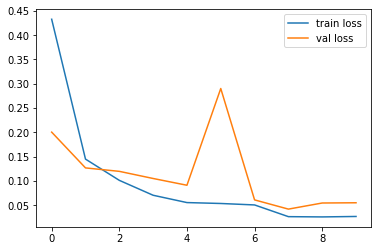

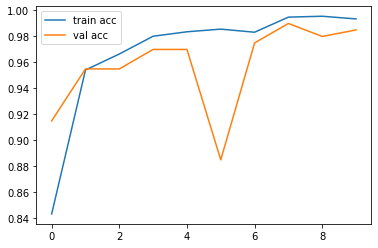

<Figure size 432x288 with 0 Axes>

In [54]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')